In [90]:
!pip install scikit-learn
!pip install --upgrade scikit-learn
import sklearn
print(sklearn.__file__)
!pip install tensorflow

/home/macavins/anaconda3/lib/python3.9/site-packages/sklearn/__init__.py
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/81/16/3aaaf911d8309b9afb29bff97e819c52b011d4ab184c7b01cec92abd018a/tensorflow-2.14.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl 

  Obtaining dependency information for cachetools<6.0,>=2.0.0 from https://files.pythonhosted.org/packages/a9/c9/c8a7710f2cedcb1db9224fdd4d8307c9e48cbddc46c18b515fefc0f1abbe/cachetools-5.3.1-py3-none-any.whl.metadata
  Using cached cachetools-5.3.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.7 MB/s eta 0:00:000:00:01m eta 0:00:01
Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached libclang-16.0.6-py2.py3-none

In [91]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

2023-10-10 10:11:13.188988: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-10 10:11:13.189038: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-10 10:11:13.189085: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-10 10:11:13.199404: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-10 10:11:14.228554: W tensorflow/compiler/

In [92]:
file = 'data/cancer_gene_expression.csv'
dataframe = pd.read_csv(file)
print(dataframe.shape)
print(dataframe.columns[0:3])

(801, 8001)
Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')


In [93]:
dataframe.columns[-1]

'Cancer_Type'

In [94]:
datanull=dataframe.isnull().sum() # missing data
g=[i for i in datanull if i > 0]

print('columns with missing vals:%d'%len(g))

columns with missing vals:0


In [95]:
# Breast Cancer Gene, kidney, Lung, Prostate, Colon
print(dataframe['Cancer_Type'].value_counts()) # different kinds of cancer

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Cancer_Type, dtype: int64


<Axes: >

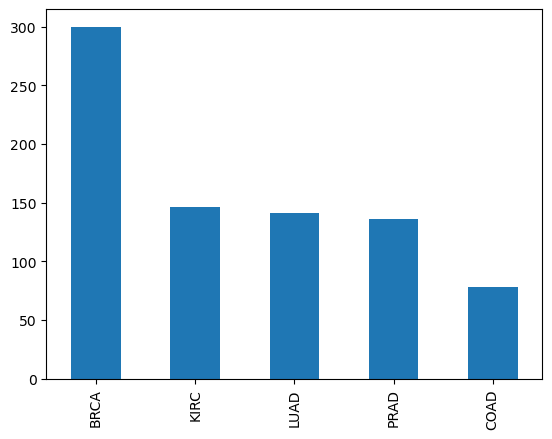

In [96]:
dataframe['Cancer_Type'].value_counts().plot.bar()



<Axes: ylabel='Cancer_Type'>

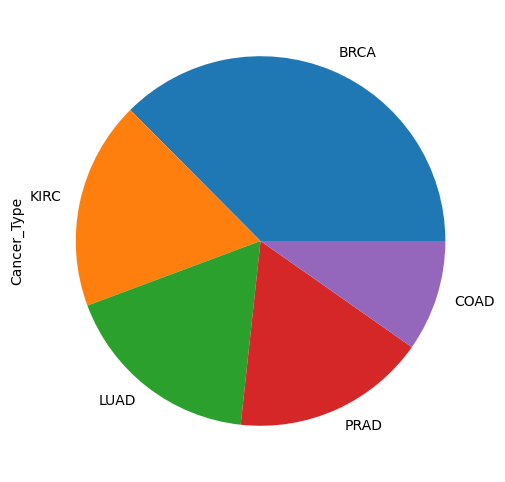

In [97]:
# Breast Cancer Gene, kidney, Lung, Prostate, Colon
dataframe['Cancer_Type'].value_counts().plot(kind='pie', figsize=(11, 6))


In [98]:
# seperate features vals from class 

x = dataframe.iloc[:,0:-1]
y = dataframe.iloc[:,-1]


In [99]:
x.shape


(801, 8000)

In [42]:
y.shape

(801,)

In [108]:
# convert to numeric form
# Encode labels
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)
nclasses=np.unique(y).shape[0]

In [109]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x,y_encoded, test_size=0.2, random_state=42)

In [103]:
dataframe.iloc[:,0:10].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,0.231049,0.010844,2.405459,0.005799,0.065640,0.022036,0.028394,0.703998,1.916364
std,0.136850,0.656692,0.153859,0.797236,0.052265,0.213557,0.148917,0.161606,0.779321,0.877010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.898595,0.000000,0.000000,0.000000,0.000000,0.000000,1.357214
50%,0.000000,0.000000,0.000000,2.358284,0.000000,0.000000,0.000000,0.000000,0.518031,1.877862
75%,0.000000,0.000000,0.000000,2.929355,0.000000,0.000000,0.000000,0.000000,1.123931,2.486792
max,1.482332,6.575004,3.778061,4.746646,0.570754,1.866275,2.169925,2.375957,4.541670,4.932231


In [104]:
# Data Normalization
# Keep in same range
# Improve performance and avoid bias

min_max_scaler = MinMaxScaler()
x_train_norm = min_max_scaler.fit_transform(x_train)
x_test_norm = min_max_scaler.fit_transform(x_test)

In [105]:
type(x_train)

pandas.core.frame.DataFrame

In [106]:
x_train.iloc[0,3]

2.18164326123

In [62]:
x_train_norm[0,3]

0.4671305057022768

In [110]:
#define model
model = Sequential()

#hidden layer 1
model.add(Dense(40, input_dim=x_train.shape[1], activation='relu'))

#hidden layer 2
model.add(Dense(20, activation='relu'))

#output layer
model.add(Dense(nclasses, activation='softmax'))

#define optimizer and learning rate. We will use Adam optimizer
opt_adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.SparseCategoricalAccuracy()])


In [112]:
#fit the model to the training data
history = model.fit(X_train, y_train, validation_data=(x_val, y_val), batch_size=32,epochs=200, verbose=1)


NameError: name 'x_val' is not defined

In [63]:
# Feature Selection
# Select relevant features for classification

# Feature Selection using Mutual Info
MI = mutual_info_classif(x_train_norm, y_train)

In [66]:
n_features = 300
selected_scores_indices = np.argsort(MI)[::-1][0:n_features]


In [67]:
x_train_select = x_train_norm[:, selected_scores_indices]
x_test_select=x_test_norm[:,selected_scores_indices]

In [68]:
x_train_select.shape

(640, 300)

In [69]:
x_test_select.shape

(161, 300)

In [70]:
# Classification: which class the data goes with. Will be using forest classifier. Random forest works with multiclass and high dimensional data. Classificatin will involve training and testing of the model

# Random Forest Classifer: deals with multiclass data, the one versus rest strat is used
# learns to predict wach class against the other

RF = OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(x_train_select, y_train)
y_pred = RF.predict(x_test_select)
pred_prob = RF.predict_proba(x_test_select)

In [76]:
# Eval model

# Accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

# Precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

# Recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

# f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.9417
precision:0.9642
recall:0.9627
f1score:0.9619


classification report


              precision    recall  f1-score   support

        BRCA       0.92      1.00      0.96        60
        COAD       1.00      0.88      0.93        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.95      0.83      0.89        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.96       161
   macro avg       0.98      0.94      0.96       161
weighted avg       0.96      0.96      0.96       161



In [77]:
# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df=pd.DataFrame(cm, index=labels, columns=labels)

In [78]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,60,0,0,0,0
COAD,1,14,0,1,0
KIRC,0,0,28,0,0
LUAD,4,0,0,20,0
PRAD,0,0,0,0,33


Text(50.722222222222214, 0.5, 'True Labels')

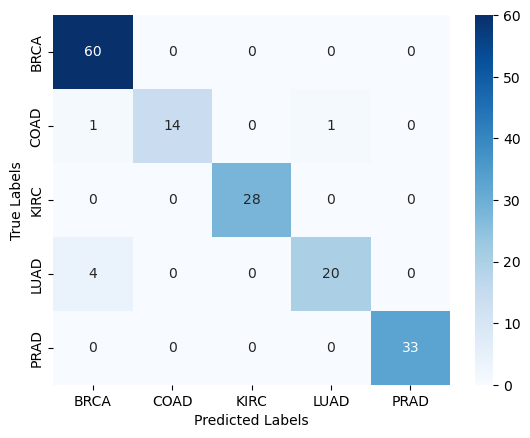

In [79]:
#visualize the confusion matrix using seaborn

sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

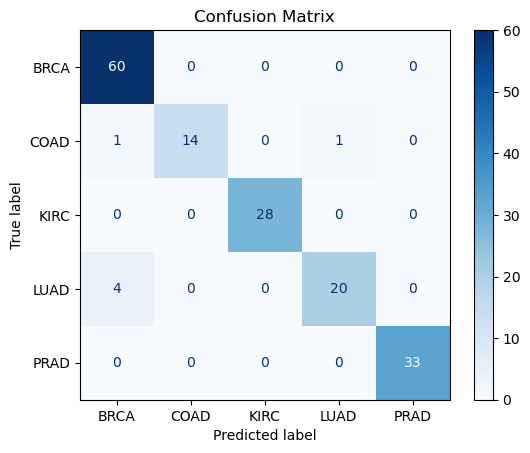

In [86]:
#visualize the confusion matrix directly
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='.4g')
plt.title('Confusion Matrix')
plt.show()


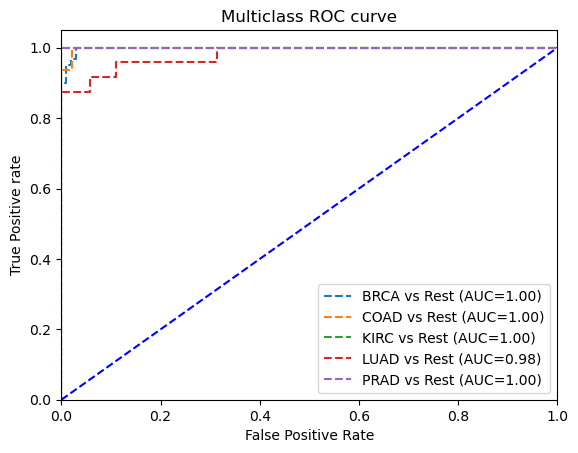

In [88]:
# roc curves will be generated for each class
# binarize the y_test labels
# the probabilities(pred_prob) are calculated for each each class
# put the y_test label in the same format as the pred_prob

y_test_binarized=label_binarize(y_test,classes=classes)

# roc curve
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
            label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()    

In [113]:
# Works really well
